In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
# Configuration options

caption = False

In [ ]:
# Data about the structure of the data file

rawdata = pd.read_csv('dataset.dat')

f = open("metadata.json")
metadata = json.load(f)

x_str       = str(metadata['demographic_label'])
y0_str      = str(metadata['support'])
y1_str      = str(metadata['oppose'])
y2_str      = str(metadata['none'])
source_name = str(metadata['name'])
link        = str(metadata['link'])
link        = str(metadata['plot_title'])

caption_txt = '''
    Source: ''' + link + '''
        
    Exact Wording:
        ''' + y0_str + '\n' + '''
        ''' + y1_str + '\n' + '''
        ''' + y2_str + "\n"


In [3]:
# Give us a more usable interface than the exact question wording

data = rawdata.rename(columns={x_str:'group', y0_str:'support', y1_str:'oppose', y2_str:'none'})

In [4]:
sns.set()

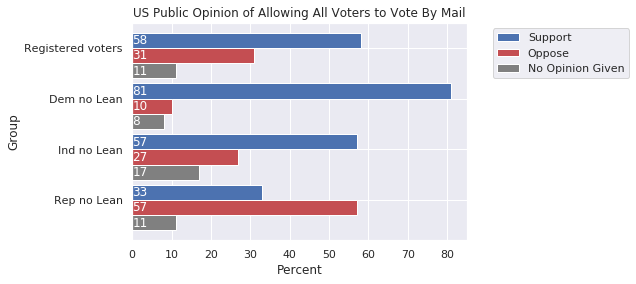

In [5]:
N = 4

ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig, ax = plt.subplots()

support_pct = data['support']
for i, v in enumerate(support_pct):
    ax.text(0, i + .07, str(v), color="white")
support_bars = ax.barh(ind, support_pct, width, color='b')

oppose_pct = data['oppose']
for i, v in enumerate(oppose_pct):
    ax.text(0, i + .07 + width, str(v), color="white")
oppose_bars = ax.barh(ind + width, oppose_pct, width, color='r')

none_pct = data['none']
for i, v in enumerate(none_pct):
    ax.text(0, i + .07 + width*2, str(v), color="white")
none_bars = ax.barh(ind+width*2, none_pct, width, color='gray')

ax.set_xlabel('Percent')
ax.set_title(title_text)
ax.set_ylabel('Group')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(data['group'])

ax.legend((support_bars[0], oppose_bars[0], none_bars[0]),
          ('Support', 'Oppose', 'No Opinion Given'),
         loc='best', bbox_to_anchor=(1, 0, 0.5, 1)
         )

if (caption):
    fig.text(-0.2, -0.5, caption_txt)

ax.invert_yaxis()

plt.show()
fig.savefig("figure.jpg", dpi=600, bbox_inches="tight")

In [6]:
print(link)

https://www.politico.com/f/?id=00000173-ba40-db2c-ad77-fa57c8a30000


In [7]:
if not (caption):
    print(caption_txt.replace('  ', '').replace('\t',''))


Source: https://www.politico.com/f/?id=00000173-ba40-db2c-ad77-fa57c8a30000

Exact Wording:
The US should allow all voters to vote by mail in elections this year to minimize the spread of the coronavirus

The US should not allow all voters to vote by mail in elections this year because it jeopardizes election security

Don't Know or No Opinion

